# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
# Número de linhas e colunas:
athletes.shape

(11538, 11)

In [7]:
# Informações sobre o conjunto de dados:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [8]:
# Estatśitica descritiva:
athletes.describe().drop(['id'], axis=1)

,height,weight,gold,silver,bronze
count,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,1.766282,72.068205,0.057722,0.056769,0.061016
std,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.210000,31.000000,0.000000,0.000000,0.000000
25%,1.690000,60.000000,0.000000,0.000000,0.000000
50%,1.760000,70.000000,0.000000,0.000000,0.000000
75%,1.840000,81.000000,0.000000,0.000000,0.000000
max,2.210000,170.000000,5.000000,2.000000,2.000000


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

## Teste de Shapiro-Wilk:

O teste shapiro-wilk pode ser usado para determinar se uma amostra segue ou não uma distribuição normal. O teste compara os valores da amostra com a distribuição dos valores esperados para uma distribuição normal.

Ele é apropriado apenas para amostras pequenas, pois é excessivamente sensível a desvios pequenos de normalidade em amostras grandes.


In [9]:
# Amostra:
sample = get_sample(athletes,'height', n=3000)

def q1():
    # Teste de normalidade:
    stat,p = sct.shapiro(sample)
    print(f'statistics:{stat}, p-value:{p}')

    # Interpretação:
    alpha = 0.05
    if p > alpha:
        return True
    else:
        return False
    
q1()

statistics:0.9961519837379456, p-value:5.681722541339695e-07


False

### **Formulação da hipótese:**

* **H0:** As alturas SÃO normalmente distribuídas.
* **H1:** As alturas NÃO são normalmente distribuídas.

### **Interpretando o resultado:**

O resultado foi **False** o p-value não é maior que o alpha.

Quando o p-value estiver abaixo de um valor crítico, que chamamos de alpha (0.05) rejeitamos a hipótese nula e há evidências de que os dados não são de uma população normalmente distribuída.

**Observação:** O valor padrão de alpha é 0.05.

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

In [10]:
import statsmodels.api as sm
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Histograma:
sns.distplot(sample, bins=25, color='red', ax=axs[0]);

# QQ-plot:
sm.qqplot(sample, fit=True, line="45", ax=axs[1]);

ModuleNotFoundError: No module named 'statsmodels'

### **Reflexões:**

* O resultado do teste de Shapiro-Wilk nos diz que os dados não são normalmente distribuídos, porém o gráfico de densidade mostra uma curva de sino clássica e simétrica típica de uma distribuição normal, o que nos leva a concluir que os resultados não são condizentes. 

* No qq-plot podemos observar que a grande maioria dos dados (pontos azuis) está em cima da linha vermelha (linha de 45°), isso significa que nosso dados são normalmente distribuídos.

### **Conclusões:**

* Com base nas definições o teste de Shapiro-Wilk diz que os dados não são normalmente distribuídos e os gráficos (histograma e qq-plot) nos dizem que eles são normalmente distribuídos, e agora em qual deles devo confiar?

* Apesar do teste de Shapiro-Wilk geralmente apresentar um desempenho muito bom, é completamente possível que o p-value seja > 0.05 e os dados não venham de uma população normal. Portanto, podemos ter que usar alguma medida adicional para ver se a hipótese nula para a nossa amostra deve realmente ser rejeitada. Como medida adicional podemos usar a assimetria e a curtose.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

## **Teste de Jarque-Bera:** 
Testa se os dados da amostra têm a assimetria (skewness) e curtose (kurtosis) correspondentes a uma distribuição normal.

Se a amostra vem de uma distribuição normal, então esses valores devem ser muito próximos de zero. Se isso acontecer, então a estatística de teste tem distribuição com dois graus de liberdade.

In [11]:
def q2():
    # Teste de normalidade:
    stat,p = sct.jarque_bera(sample)
    print(f'statistics:{stat}, p-value:{p}')

    # Interpretação:
    alpha = 0.05
    if p > alpha:
        return True
    else:
        return False
q2()

statistics:13.03363513594265, p-value:0.001478366424594868


False

__Para refletir__:

* Esse resultado faz sentido?

Assim como no teste de Shapiro-Wilk o teste de Person apresenta p-value menor que 0.05, mostrando que há evidências de que a amostra não se trata de uma distruibição normal.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

## Teste de D'Agostino-Pearson:

Esse teste também se baseia na curtose e na assimetria para determinar se a distribuição de dados se afasta da distribuição normal.

A distribuição normal padrão tem curtose e assimetria igual a zero.

In [12]:
# Amostra:
new_sample = get_sample(athletes,'weight', n=3000)

def q3():
    # Teste de normalidade:
    stat,p = sct.normaltest(new_sample)
    print(f'statistics:{stat}, p-value:{p}')

    # Interpretação:
    alpha = 0.05
    if p > alpha:
        return True
    else:
        return False
q3()

statistics:510.24655809881176, p-value:1.5898922918029537e-111


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

In [13]:
fig, axs = plt.subplots(ncols=3, figsize=(16,8))

# Histograma:
sns.distplot(new_sample, bins=25, color='red', ax=axs[0])

# Box plot:
sns.boxplot(new_sample,orient='v', color='red', ax=axs[1])

# QQ-plot:
sm.qqplot(new_sample, fit=True, line="45", ax=axs[2]);

NameError: name 'sm' is not defined

In [14]:
print(f'assimetria: {sct.skew(sample)}\ncurtose: {sct.kurtosis(sample)}')

assimetria: 0.15974896040186146
curtose: -0.046799141975459424


* Um valor positivo para a assimetria indica que a cauda do lado direito é maior que a do lado esquerdo.

* Além das informações da assimetria e da curtose notamos mais uma vez que o  p-value é menor do que o alpha, confirmando que os dados não vieram de uma população normal.

* O gráfico QQ compara os quantis teóricos esperados sob uma distribuição normal com os valores reais observados (ordenados). Quando uma distribuição é normalmente distribuída, você verá uma linha reta. Quanto mais distorcida a linha, mais distante a distribuição se afasta da normalidade.

* Existi uma curva pronunciada no gráfico isso nos diz que a nossa distribuição não é normalmente distribuída.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

Por que usar transformações logarítimica nos dados?

* Supondo que a distribuição da variável em questão possui um viés, ou seja, uma das extremidades elevadas e uma cauda longa, algumas medidas como correlação ou regressão podem ser bastante influenciadas pelo pico da distribuição ou pelos outliers. A aplicação da transformação pode reduzir o efeito do viés.

In [15]:
# transformação logarítmica:
new_sample_log = np.log(new_sample)

def q4():
    # Refazendo o teste de D'Agostino-Pearson:
    stat,p = sct.normaltest(new_sample_log)
    print(f'statistics:{stat}, p-value:{p}')

    # Interpretação:
    alpha = 0.05
    if p > alpha:
        return True
    else:
        return False
q4()

statistics:45.91534331977353, p-value:1.0705572101256944e-10


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Histograma:
sns.distplot(new_sample_log, bins=25, color='red', ax=axs[0]);

# QQ-plot:
sm.qqplot(new_sample_log, fit=True, line="45", ax=axs[1]);

NameError: name 'sm' is not defined

* Podemos observar que após a transformação os dados se aproximam mais de uma distribuição normal. Isso pode ser notado comparando o p-value antes **(1.5898922918029537e-111)** e após **(1.0705572101256944e-10)** a transformação.

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

Para as questões a seguir vamos comparar dois conjuntos de valores para uma variável contínua, e usaremos o teste de t-student.

* **Existem dois tipos básicos desses testes:**

* Um test-t de uma amostra testará a probabilidade de que a média de uma população seja diferente de um determinado valor.

* Um test-t de duas amostras testará a probabilidade de que exista uma diferença entre as médias de duas populações.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [17]:
# Criando os dataframes:
bra = athletes[athletes.nationality == 'BRA']
usa = athletes[athletes.nationality == 'USA']
can = athletes[athletes.nationality == 'CAN']

def q5():
    # Média das alturas de 'BRA' e 'USA':
    print(f'BRA: {bra.height.mean()}\nUSA: {usa.height.mean()}')
    
    # Teste de hipótese das amostras:
    bra_usa = sct.ttest_ind(bra.height, usa.height, equal_var=False, nan_policy='omit')

    # Verificando se as médias são estatisticamente iguais:
    alpha = 0.05
    if bra_usa[1] > alpha:
        return True
    else:
        return False
q5()

BRA: 1.764033613445378
USA: 1.787767857142857


False

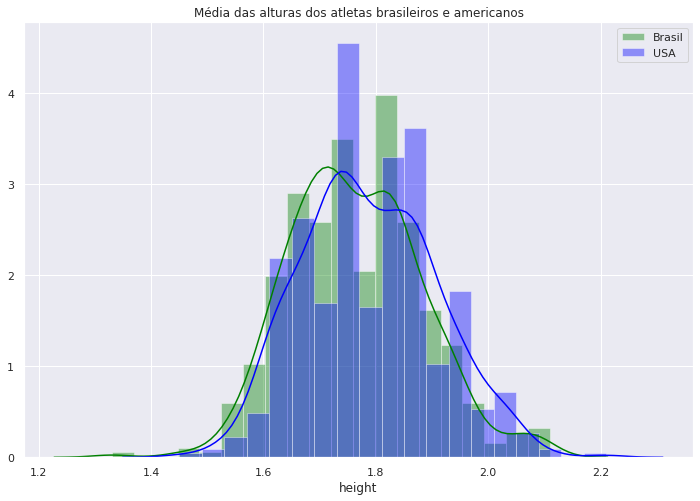

In [18]:
sns.distplot(bra.height.dropna(), label='Brasil', color='green')
sns.distplot(usa.height.dropna(), label='USA', color ='blue')
plt.title('Média das alturas dos atletas brasileiros e americanos')
plt.legend();

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [19]:
def q6():
    # Média das alturas de 'BRA' e 'CAN':
    print(f'BRA: {bra.height.mean()}\nCAN: {can.height.mean()}')
    
    # Teste de hipótese das amostras:
    bra_can = sct.ttest_ind(bra.height, can.height, equal_var=False, nan_policy='omit')

    # Verificando se as médias são estatisticamente iguais:
    alpha = 0.05
    if bra_can[1] > alpha:
        return True
    else:
        return False
q6()

BRA: 1.764033613445378
CAN: 1.75859375


True

Pelos resultados podemos dizer que as alturas dos atletas do Brasil e do Canadá tem distribuições iguais.

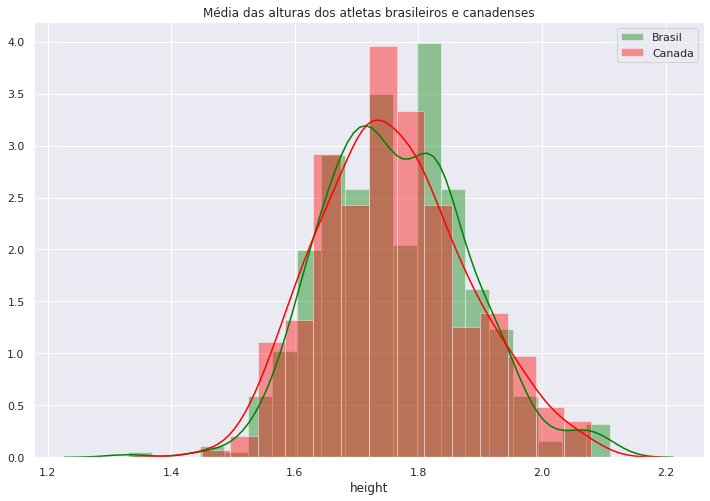

In [20]:
sns.distplot(bra.height.dropna(), label='Brasil', color='green')
sns.distplot(can.height.dropna(), label='Canada', color ='red')
plt.title('Média das alturas dos atletas brasileiros e canadenses')
plt.legend();

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [21]:
def q7():
    # Média das alturas de 'USA' e 'CAN':
    print(f'USA: {usa.height.mean()}\nCAN: {can.height.mean()}')
    
    # Teste de hipótese das amostras:
    usa_can = sct.ttest_ind(usa.height, can.height, equal_var=False, nan_policy='omit')

    # Valor de p-value:
    return float(round(usa_can[1],8))
q7()

USA: 1.787767857142857
CAN: 1.75859375


0.00046601

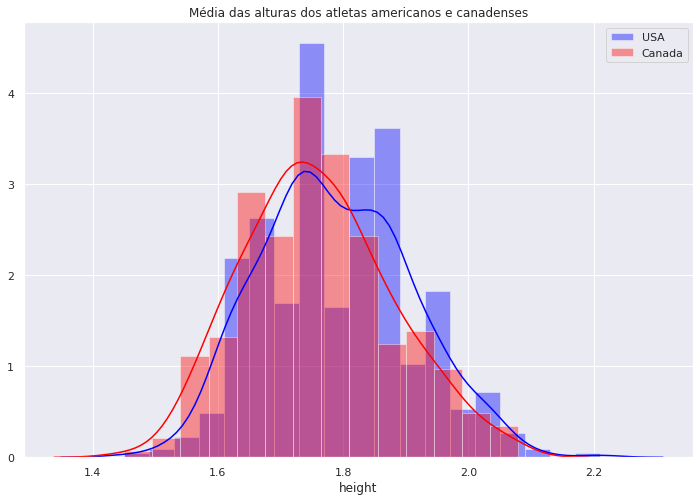

In [22]:
sns.distplot(usa.height.dropna(), label='USA', color='blue')
sns.distplot(can.height.dropna(), label='Canada', color ='red')
plt.title('Média das alturas dos atletas americanos e canadenses')
plt.legend();

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

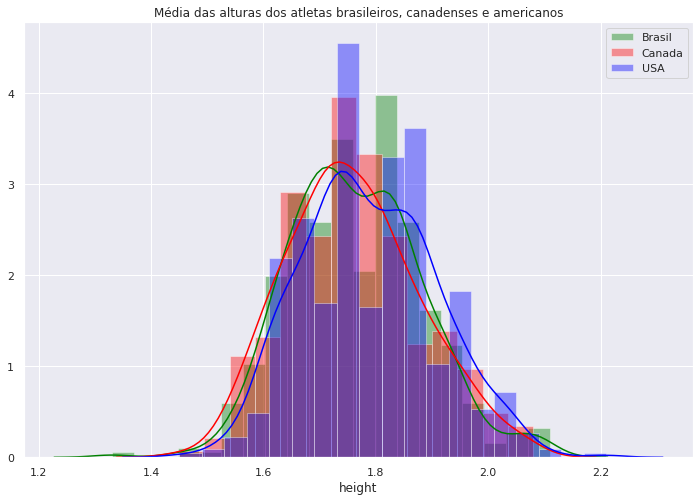

In [23]:
sns.distplot(bra.height.dropna(), label='Brasil', color='green')
sns.distplot(can.height.dropna(), label='Canada', color ='red')
sns.distplot(usa.height.dropna(), label='USA', color ='blue')
plt.title('Média das alturas dos atletas brasileiros, canadenses e americanos')
plt.legend();

In [24]:
print('Altura média Brasil = ',bra.height.mean())
print('Altura média Canada = ',can.height.mean())
print('Altura média Estados Unidos = ',usa.height.mean())

Altura média Brasil =  1.764033613445378
Altura média Canada =  1.75859375
Altura média Estados Unidos =  1.787767857142857


* O p-value encontrado ficou abaixo do t-valor de 0.001 encontrado na tabela t. Verifique você mesmo: [tabela t-student](http://www.epi.uff.br/wp-content/uploads/2015/05/Tabela-T.pdf).

* Por mais que as distribuições se pareçam, conseguimos notar (através do gráfico) que a altura dos atletlas americanos é estatisticamente maior que os atletas dos outros países.